In [1]:
pwd

'C:\\Users\\Pavan Yenigi'

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
enc =LabelEncoder()

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Exploratory data analysis

In [39]:
data.drop('id',
  axis='columns', inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [41]:
data['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
27.700000     37
            ... 
60.200000      1
63.300000      1
54.300000      1
46.600000      1
48.400000      1
Name: bmi, Length: 419, dtype: int64

In [42]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [43]:
data['bmi'].fillna(data['bmi'].mean(),inplace= True)

In [44]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [45]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [74]:
data.drop('id',axis=1)

KeyError: "['id'] not found in axis"

# Outlier removal

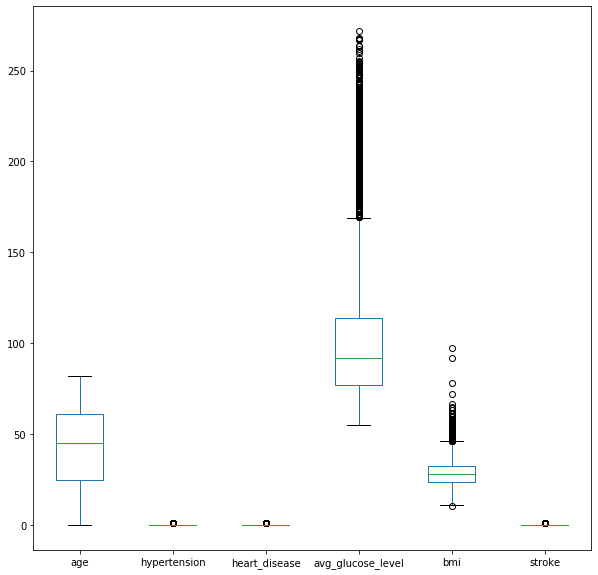

In [47]:
plt.rcParams["figure.figsize"] = [10,10]
data.plot(kind = 'box')
plt.show()

In [34]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [36]:
data['avg_glucose_level']>114.0

0        True
1        True
2       False
3        True
4        True
        ...  
5105    False
5106     True
5107    False
5108     True
5109    False
Name: avg_glucose_level, Length: 5110, dtype: bool

# Label Encoding (One hot encoding)

In [51]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


In [50]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [90]:
gender=enc.fit_transform(data['gender'])

In [91]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [107]:
work_type = enc.fit_transform(data['work_type'])
ever_married=enc.fit_transform(data['ever_married'])
Residence_type=enc.fit_transform(data['Residence_type'])

In [108]:
data['ever_married']=ever_married
data['smoking_status']=smoking_status
data['gender']=gender
data['work_type']=work_type
data['Residence_type']=Residence_type

In [109]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Splitting the data for train and test

In [110]:
x = data.drop('stroke',axis=1)

In [111]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [112]:
y = data['stroke']

In [113]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=101)

In [174]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [175]:
x_test.shape

(1022, 10)

# Normalize

In [176]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [177]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [178]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.fit_transform(x_test)

# Training

# DT

In [179]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [180]:
dt.fit(x_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [181]:
dt.feature_importances_

array([0.03805518, 0.16581424, 0.026498  , 0.02371162, 0.00666567,
       0.03725076, 0.05714874, 0.3425868 , 0.24120617, 0.06106283])

In [182]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [203]:
y_pred=dt.predict(x_test)

In [204]:
y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [205]:
from sklearn.metrics import accuracy_score

In [241]:
dt_ac= accuracy_score(y_test,y_pred)

In [243]:
dt_ac

0.9471624266144814

# Logistic regression

In [208]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [209]:
lr.fit(x_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
y_pred_lr=lr.predict(x_test_std)

In [214]:
ac_lr=accuracy_score(y_test,y_pred)

In [215]:
ac_lr

0.9422700587084148

# KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [217]:
knn.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [218]:
y_pred=knn.predict(x_test_std)

In [219]:
knn_ac=accuracy_score(y_test,y_pred)

In [220]:
knn_ac

0.9442270058708415

# Random forest

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [222]:
rf.fit(x_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
y_pres=rf.predict(x_test_std)

In [224]:
rf_ac=accuracy_score(y_test,y_pred)

In [225]:
rf_ac

0.9442270058708415

# SVM

In [226]:
from sklearn.svm import SVC

In [227]:
sv=SVC()

In [228]:
sv.fit(x_train_std,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [237]:
y_pred=sv.predict(x_test_std)

In [238]:
sv_ac=accuracy_score(y_test,y_pred)

In [239]:
sv_ac

0.9471624266144814

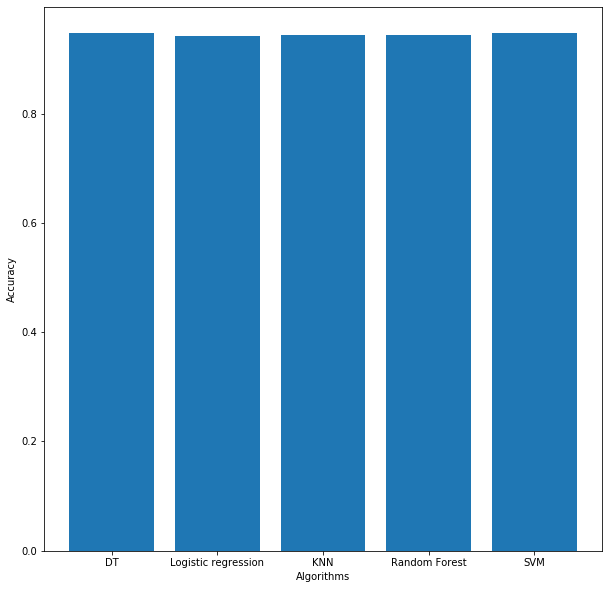

In [246]:
plt.bar(['DT','Logistic regression','KNN','Random Forest','SVM'],[dt_ac,ac_lr,knn_ac,rf_ac,sv_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [269]:
import pickle
with open('StrokePrediction.sav', 'wb') as pickle_file:
    pickle.dump(lr, pickle_file)

In [270]:
with open('StrokePrediction.sav', 'rb') as pickle_file:
    new_data =pickle.load(pickle_file)

In [ ]:
StrokePrediction

In [265]:
new_data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)